Cargamos todas las librerías necesarias. Utilizaremos la clase KNeighborsClassifier, para poder usar el algoritmo KNN para problemas de clasificación.

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Primero crearemos unos datos de prueba, de los que sabemos la categoría y creamos un punto nuevo, del que no sabemos su género y visualizamos todos los puntos.

In [2]:
data = {'Masa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

In [3]:
punto_nuevo = {'Masa': [70],
               'Altura': [1.82]}

Convertimos a dataframe ...

In [34]:
df = pd.DataFrame(data)
punto_nuevo = pd.DataFrame(punto_nuevo)
df.head()

,Masa,Altura,Genero
0,50,1.48,m
1,80,1.82,h
2,90,1.85,h
3,45,1.55,m
4,60,1.60,m


Graficamos los puntos!

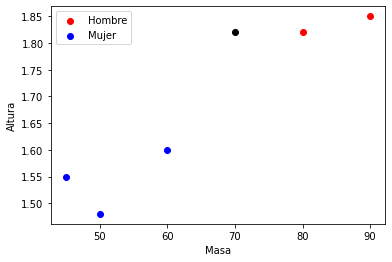

In [5]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")
ax.scatter(punto_nuevo['Masa'],
           punto_nuevo['Altura'],
           c="black")
plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.show()

A continuación entrenamos el algoritmo KNN con los datos para los que tenemos etiquetas. 

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
X = df[['Masa', 'Altura']]
y = df[['Genero']]

knn.fit(X, y.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [61]:
prediccion = knn.predict(punto_nuevo)
print(prediccion)

['h']


In [53]:
train_X, valid_X, train_y, valid_y = train_test_split(df[['Masa', 'Altura']], df.Genero, 
                                                      test_size=0.2, random_state=123)

In [54]:
train_X

,Masa,Altura
3,45,1.55
4,60,1.60
0,50,1.48
2,90,1.85


In [55]:
train_y

3    m
4    m
0    m
2    h
Name: Genero, dtype: object

In [56]:
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [57]:
prediccion = knn.predict(punto_nuevo)
print(prediccion)

['m']
